In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("pulsar_data_train (1).csv")

In [3]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


### Renaming columns

In [4]:
df.rename(columns={" Mean of the integrated profile":"pulse_amplitude",
                 " Standard deviation of the integrated profile":"pulse_amplitude_variation",
                 " Excess kurtosis of the integrated profile":"amplitude_distribution_shape",
                 " Skewness of the integrated profile":"amplitude_distribution_asymmetry",
                 " Mean of the DM-SNR curve":"average_signal_strength",
                 " Standard deviation of the DM-SNR curve":"variability_of_snr",
                 " Excess kurtosis of the DM-SNR curve":"distribution_shape_of_snr",
                 " Skewness of the DM-SNR curve":"asymmetry_of_snr_distribution"},inplace=True)

In [5]:
df.head()

,pulse_amplitude,pulse_amplitude_variation,amplitude_distribution_shape,amplitude_distribution_asymmetry,average_signal_strength,variability_of_snr,distribution_shape_of_snr,asymmetry_of_snr_distribution,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [6]:
df.isnull().sum()

pulse_amplitude                        0
pulse_amplitude_variation              0
amplitude_distribution_shape        1735
amplitude_distribution_asymmetry       0
average_signal_strength                0
variability_of_snr                  1178
distribution_shape_of_snr              0
asymmetry_of_snr_distribution        625
target_class                           0
dtype: int64

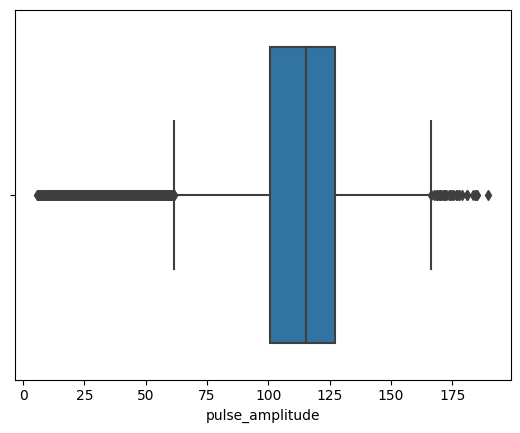

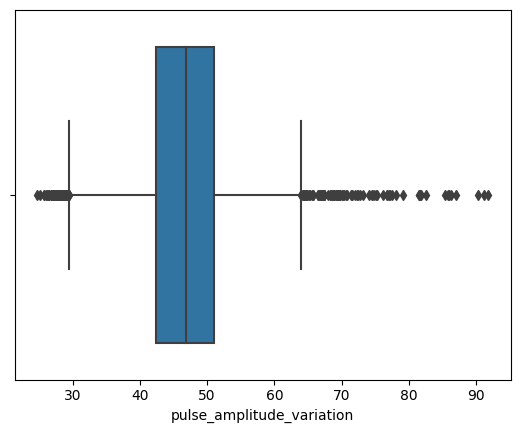

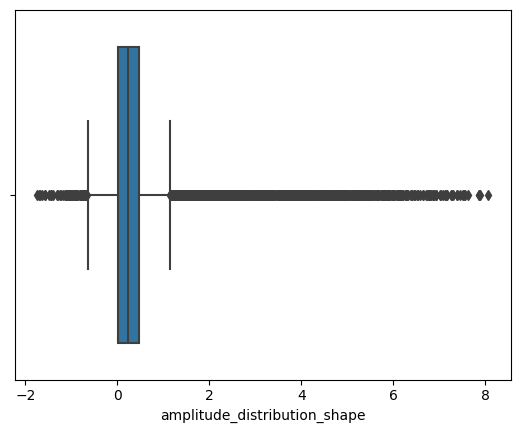

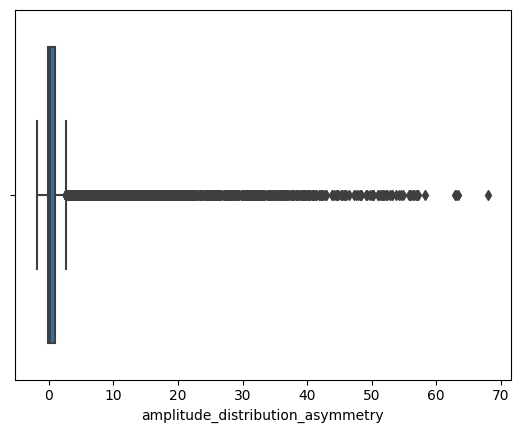

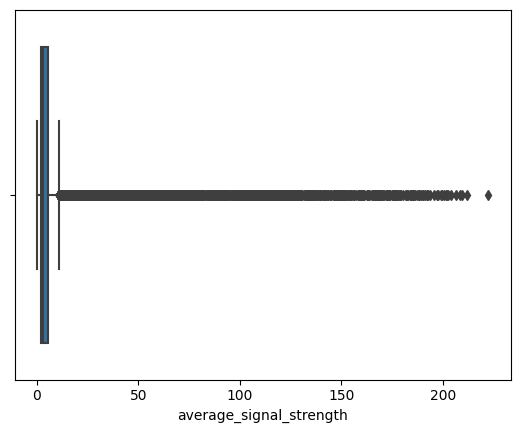

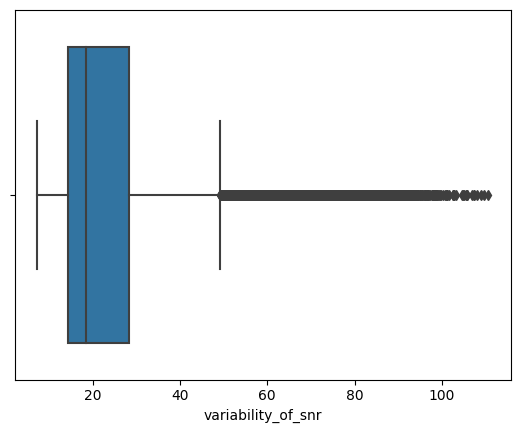

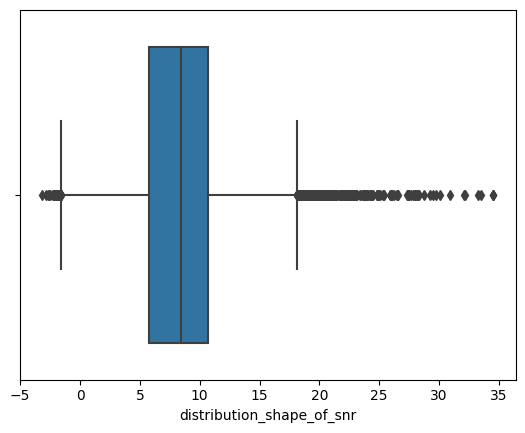

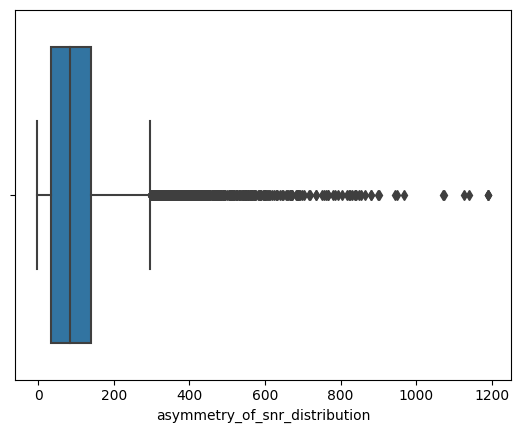

In [7]:
for i in df[['pulse_amplitude',
 'pulse_amplitude_variation',
 'amplitude_distribution_shape',
 'amplitude_distribution_asymmetry',
 'average_signal_strength',
 'variability_of_snr',
 'distribution_shape_of_snr',
 'asymmetry_of_snr_distribution']]:
    sns.boxplot(data = df, x = df[i])
    plt.show()

### In amplitude_distribution_shape ,variability_of_snr,asymmetry_of_snr_distribution columns we have outliers.For this reason we fill this columns with median.

In [8]:
df=df.fillna(df.median())

In [9]:
df.isnull().sum()

pulse_amplitude                     0
pulse_amplitude_variation           0
amplitude_distribution_shape        0
amplitude_distribution_asymmetry    0
average_signal_strength             0
variability_of_snr                  0
distribution_shape_of_snr           0
asymmetry_of_snr_distribution       0
target_class                        0
dtype: int64

### We are creating decision tree model so we do not need to check scale of data.

In [10]:
df.describe()

,pulse_amplitude,pulse_amplitude_variation,amplitude_distribution_shape,amplitude_distribution_asymmetry,average_signal_strength,variability_of_snr,distribution_shape_of_snr,asymmetry_of_snr_distribution,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.443251,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.992144,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.421239,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


### We have imbalance problem in our dataset.

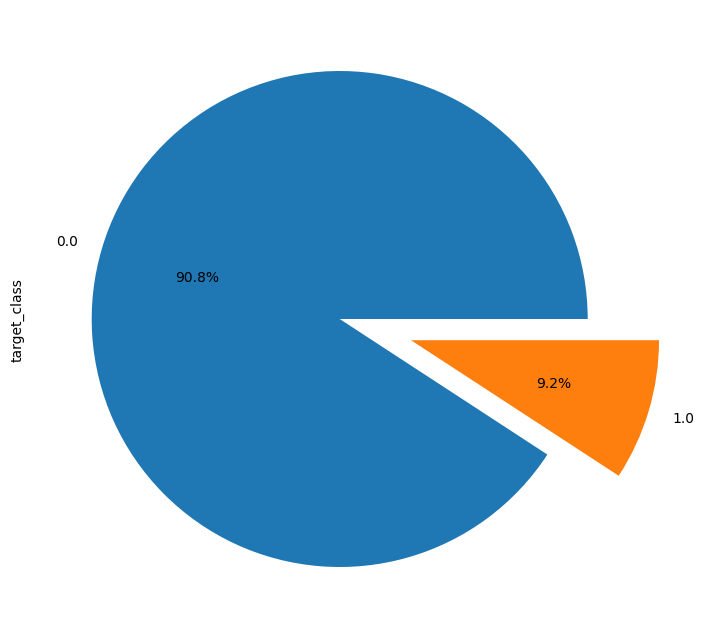

In [11]:
fig,ax=plt.subplots(figsize=(8,10))
explode=[0.0,0.3]
ax=(df["target_class"].value_counts(normalize=True)*100).plot.pie(explode=explode,autopct="%.1f%%")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [13]:
X = df.drop("target_class",axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [15]:
feature_importance = model.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

pulse_amplitude: 0.2382
pulse_amplitude_variation: 0.0514
amplitude_distribution_shape: 0.2361
amplitude_distribution_asymmetry: 0.2505
average_signal_strength: 0.0851
variability_of_snr: 0.0488
distribution_shape_of_snr: 0.0529
asymmetry_of_snr_distribution: 0.0370


### Let's choose pulse_amplitude: 0.1587,amplitude_distribution_shape: 0.2531,amplitude_distribution_asymmetry: 0.3059.

In [16]:
selected_features = ["pulse_amplitude",'amplitude_distribution_asymmetry', 'amplitude_distribution_shape']
X = df[selected_features]
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.9764565043894653
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2279
         1.0       0.94      0.79      0.86       227

    accuracy                           0.98      2506
   macro avg       0.96      0.89      0.92      2506
weighted avg       0.98      0.98      0.98      2506



In [18]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

[[2267   12]
 [  47  180]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

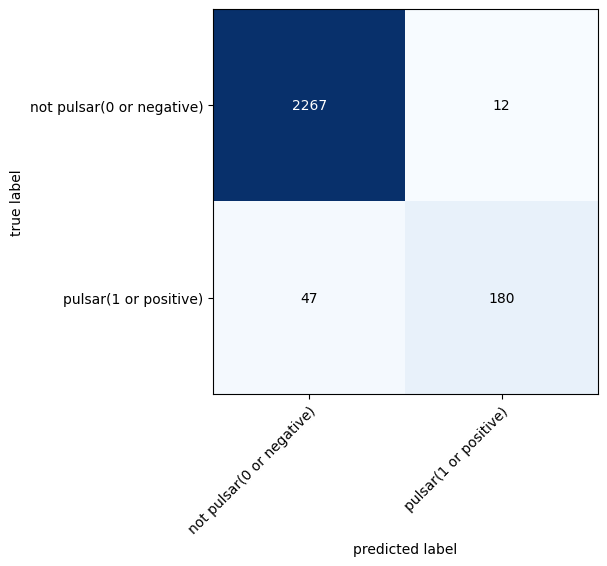

In [19]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["not pulsar(0 or negative)","pulsar(1 or positive)"],figsize=(12,5))

### Let's choose best parametres

In [21]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [22]:
cv = StratifiedKFold(n_splits=5,shuffle=True) #I used stratifiedKfold because we have imbalance.
params = {
    'n_estimators': [100, 200, 300], 
    'criterion': ['gini', 'entropy'],
    'max_depth': [ 1, 2, 3, 4, 5],
 
}


grid_search=GridSearchCV(model,param_grid=params,cv=cv,return_train_score=False)

grid_search.fit(X_train, y_train)
grid_search.cv_results_

{'mean_fit_time': array([0.23394828, 0.44254966, 0.6654294 , 0.31581879, 0.62606144,
        0.88816624, 0.3641923 , 0.72513809, 1.08329968, 0.43209906,
        0.87314634, 1.35030675, 0.52282667, 1.03402982, 1.69915652,
        0.25198169, 0.62774982, 0.83078737, 0.34633579, 0.68036022,
        1.08447247, 0.50344539, 0.98929791, 1.36360431, 0.55518966,
        1.09659505, 1.61818442, 0.73116426, 1.35422258, 2.0566515 ]),
 'std_fit_time': array([0.00940703, 0.0058388 , 0.01021166, 0.00658197, 0.02229144,
        0.02631424, 0.00749428, 0.00526832, 0.00611218, 0.00778383,
        0.00749991, 0.02241626, 0.01031059, 0.01140473, 0.11927427,
        0.00757431, 0.07786852, 0.06335153, 0.01096089, 0.00539355,
        0.06122606, 0.03849184, 0.04392374, 0.02073092, 0.00481116,
        0.01169073, 0.01023983, 0.09577693, 0.09238429, 0.1872792 ]),
 'mean_score_time': array([0.01507969, 0.03097792, 0.04297247, 0.01717587, 0.03319602,
        0.04061794, 0.01722045, 0.03125072, 0.04687533, 0.01

### Upper  code not easy to interpret.

In [23]:
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.233948,0.009407,0.015080,0.002892,gini,1,100,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.974564,0.969576,0.967565,0.975549,0.967565,0.970964,0.003435,30
1,0.442550,0.005839,0.030978,0.003044,gini,1,200,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.974564,0.971571,0.968064,0.975549,0.967565,0.971462,0.003258,29
2,0.665429,0.010212,0.042972,0.002792,gini,1,300,"{'criterion': 'gini', 'max_depth': 1, 'n_estim...",0.974564,0.970574,0.966567,0.977046,0.968563,0.971463,0.003846,28
3,0.315819,0.006582,0.017176,0.002999,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.975062,0.972070,0.968563,0.979042,0.972555,0.973458,0.003477,21
4,0.626061,0.022291,0.033196,0.002496,gini,2,200,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.975561,0.972070,0.969062,0.979042,0.972056,0.973558,0.003428,20
5,0.888166,0.026314,0.040618,0.007649,gini,2,300,"{'criterion': 'gini', 'max_depth': 2, 'n_estim...",0.975561,0.973067,0.969062,0.978044,0.973054,0.973758,0.002988,19
6,0.364192,0.007494,0.017220,0.003174,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.975561,0.974065,0.970559,0.980539,0.974551,0.975055,0.003218,14
7,0.725138,0.005268,0.031251,0.000003,gini,3,200,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.975062,0.973566,0.970559,0.981038,0.973553,0.974756,0.003465,15
8,1.083300,0.006112,0.046875,0.000002,gini,3,300,"{'criterion': 'gini', 'max_depth': 3, 'n_estim...",0.975062,0.974065,0.970559,0.981038,0.976048,0.975354,0.003392,12
9,0.432099,0.007784,0.018758,0.006243,gini,4,100,"{'criterion': 'gini', 'max_depth': 4, 'n_estim...",0.976559,0.973566,0.971058,0.983533,0.974052,0.975753,0.004264,10


In [24]:
results.sort_values(by='rank_test_score', ascending=True)[["param_criterion","param_max_depth","param_n_estimators","mean_test_score","rank_test_score"]]

,param_criterion,param_max_depth,param_n_estimators,mean_test_score,rank_test_score
14,gini,5,300,0.976252,1
12,gini,5,100,0.976252,1
27,entropy,5,100,0.976153,3
28,entropy,5,200,0.976153,4
13,gini,5,200,0.976153,4
11,gini,4,300,0.975953,6
25,entropy,4,200,0.975953,7
29,entropy,5,300,0.975953,8
10,gini,4,200,0.975853,9
9,gini,4,100,0.975753,10


In [25]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}

<Axes: xlabel='target_class', ylabel='Density'>

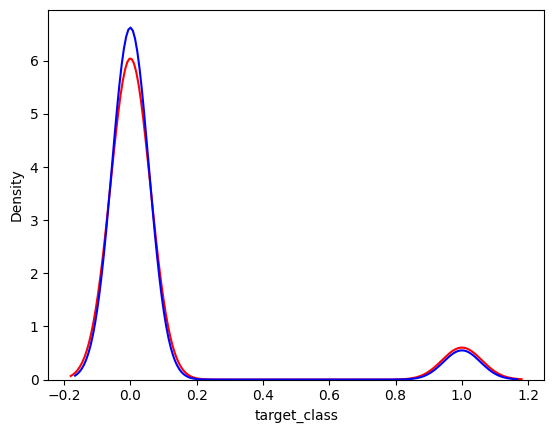

In [26]:
sns.kdeplot(data=y_test,color="red")
sns.kdeplot(data=y_pred,color="blue")

In [27]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9765


In [29]:
from sklearn.tree import export_graphviz
import graphviz

In [30]:
best_params = {'criterion': 'gini', 'max_depth': 5, 'n_estimators': 100}
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)
selected_tree = model.estimators_[0]
dot_data = export_graphviz(selected_tree, out_file=None, feature_names=X.columns, class_names=["Not Pulsar", "Pulsar"], filled=True)

graph = graphviz.Source(dot_data)

graph.render(view=True)

'Source.gv.pdf'

In [32]:
selected_tree = model.estimators_[1]

dot_data = export_graphviz(selected_tree, out_file=None, feature_names=X.columns, class_names=["Not Pulsar", "Pulsar"], filled=True)

graph = graphviz.Source(dot_data)

output_filename = "tree_visualization_2.pdf"  
graph.render(filename=output_filename, view=True)

'tree_visualization_2.pdf.pdf'